<a href="https://colab.research.google.com/github/nitish9801/colab/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [3]:
import pandas as pd
pd.__version__

'2.2.2'

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [5]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [6]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [8]:
dftrain.shape

(627, 9)

In [9]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

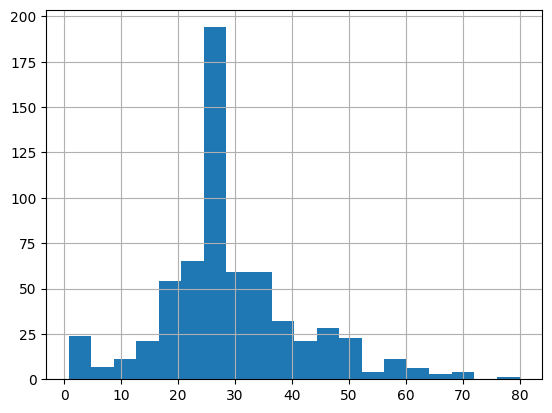

In [10]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

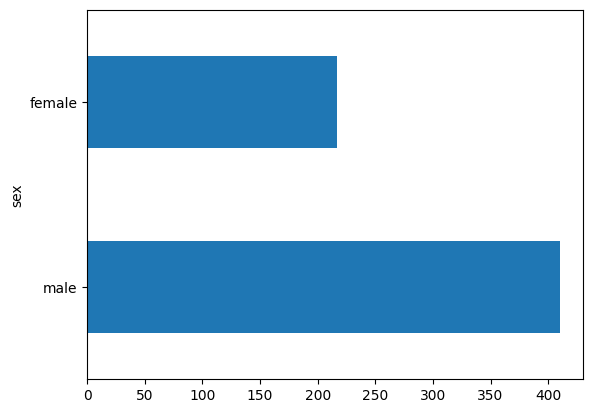

In [11]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

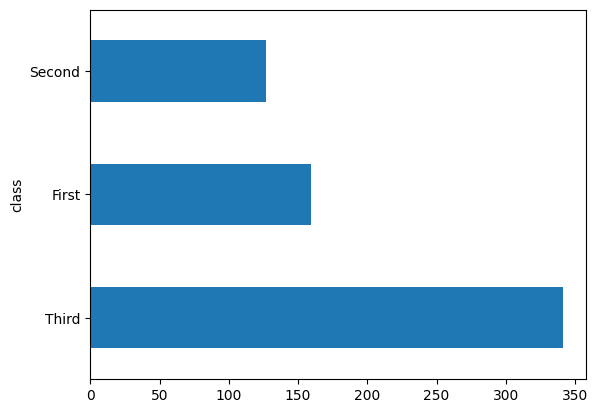

In [12]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

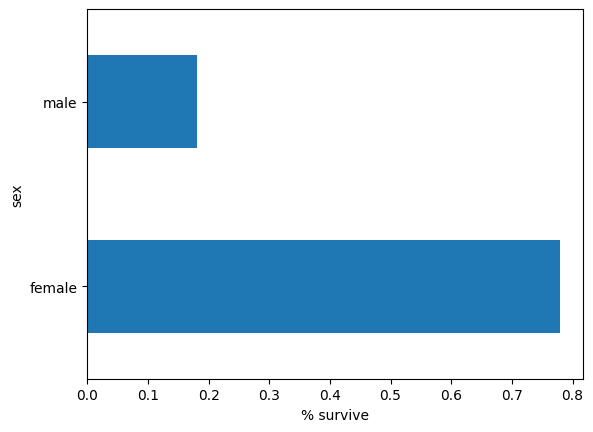

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [14]:
CATEGORICAL_COLUMNS = ['sex', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare', 'n_siblings_spouses', 'parch']

inputs = {}
preprocessing_layers = []

for feature_name in CATEGORICAL_COLUMNS:
  inputs[feature_name] = tf.keras.Input(shape=(1,), dtype=tf.string, name=feature_name)
  vocab = dftrain[feature_name].unique()
  lookup = tf.keras.layers.StringLookup(vocabulary=vocab)
  preprocessing_layers.append(lookup(inputs[feature_name]))


for feature_name in NUMERIC_COLUMNS:
  inputs[feature_name] = tf.keras.Input(shape=(1,), dtype=tf.float32, name=feature_name)
  normalizer = tf.keras.layers.Normalization()
  normalizer.adapt(dftrain[feature_name].to_numpy().reshape(-1, 1))
  preprocessing_layers.append(normalizer(inputs[feature_name]))



In [15]:
# Combine into one tensor
x = tf.keras.layers.concatenate(preprocessing_layers)

preprocessing_model = tf.keras.Model(inputs=inputs, outputs=x)
preprocessed_output = preprocessing_model(dict(dftrain))


In [16]:
# use output of preprocessing model
x = preprocessing_model.output
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=preprocessing_model.input, outputs=output)
model

<Functional name=functional_1, built=True>

In [17]:
for col in CATEGORICAL_COLUMNS:
    dftrain[col] = dftrain[col].astype("string")
    dfeval[col] = dfeval[col].astype("string")

dftrain.dtypes

,0
sex,string[python]
age,float64
n_siblings_spouses,int64
parch,int64
fare,float64
class,string[python]
deck,string[python]
embark_town,string[python]
alone,string[python]


In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x=dict(dftrain), y=y_train, epochs=15, batch_size=32)


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5961 - loss: 1.1591
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6353 - loss: 1.0078
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.0228 
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 0.9230
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6766 - loss: 0.8818
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6585 - loss: 0.8362 
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.8466 
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.8274 
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.7935 
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6551 - loss: 0.8271 
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.7508 
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.67

In [19]:
result = model.evaluate(x=dict(dfeval), y=y_eval, return_dict=True)
print(result['accuracy'])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6679 - loss: 0.7586  
0.7121211886405945


In [27]:
result = model.predict(x=dict(dfeval))
print(dfeval.loc[0])
print(y_eval.loc[0])
print(result[0])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
[0.29274192]


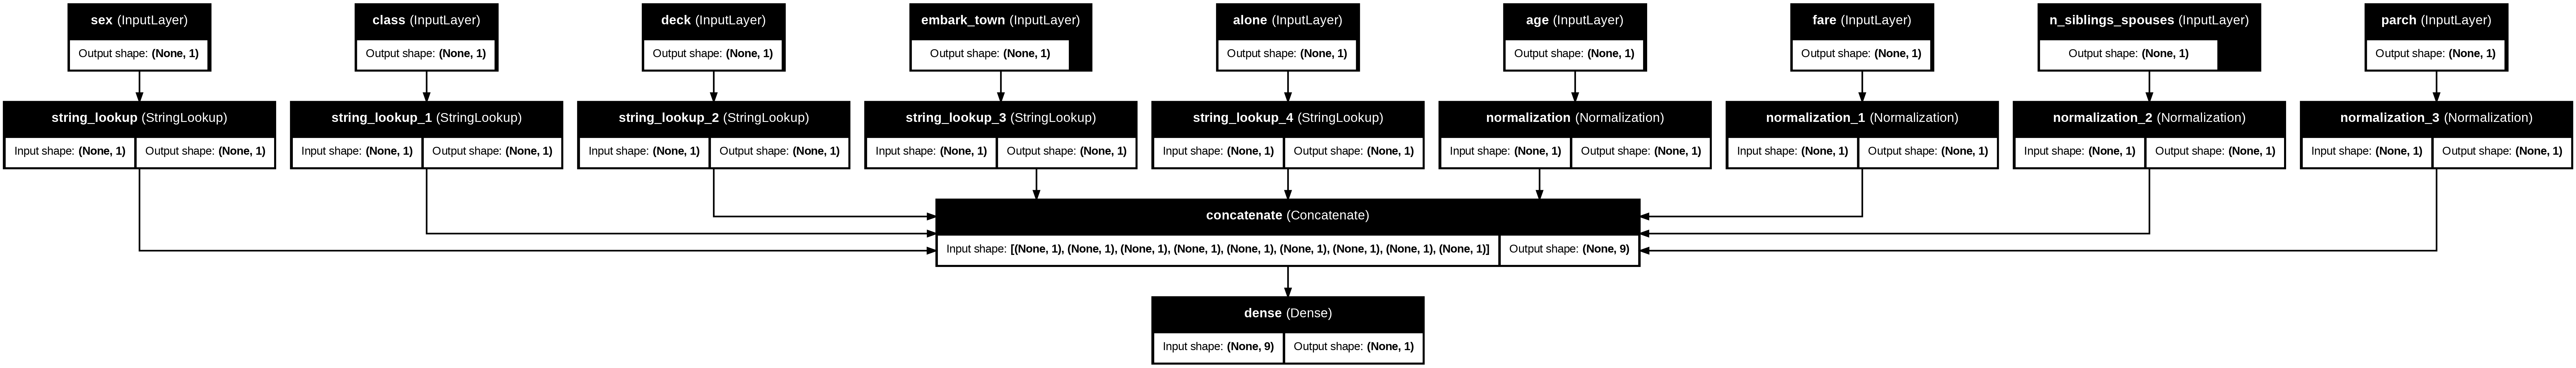

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [31]:

test_input = {name:np.array([value]) for name, value in dict(dfeval.iloc[0]).items()}
print(test_input)
test_input = {name:tf.convert_to_tensor([value]) for name, value in dict(dfeval.iloc[0]).items()}
print(test_input)
print(model.predict(x=test_input))


{'sex': array(['male'], dtype='<U4'), 'age': array([35.]), 'n_siblings_spouses': array([0]), 'parch': array([0]), 'fare': array([8.05]), 'class': array(['Third'], dtype='<U5'), 'deck': array(['unknown'], dtype='<U7'), 'embark_town': array(['Southampton'], dtype='<U11'), 'alone': array(['y'], dtype='<U1')}
{'sex': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'male'], dtype=object)>, 'age': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([35.])>, 'n_siblings_spouses': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, 'parch': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, 'fare': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.05])>, 'class': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Third'], dtype=object)>, 'deck': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'unknown'], dtype=object)>, 'embark_town': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Southampton'], dtype=object)>, 'alone': <tf.Tensor: shape=(1